# Cartopy
1.a. Cargue los datos del archivo Deptos_Colombia.csv, utilice las estructura de su elección: lista, diccionario, arreglo (numpy)
1.b. Elimine los departamentos que tienen información incompleta.

2.a. Los valores para Pobres, Vulnerables, Clase_Media, Clase_Alta están en habitantes, calcule esos valores en porcentaje y agreguelos a sus datos.
2.b. Los valores para Porc_Edad_Trabajar, Porc_Econ_Activa, Porc_Ocupados, Porc_Desocupados están en porcentajes, calcule esos valores en habitantes y agreguelos a sus datos.

3. Realice un mapa de Colombia, con un punto en cada una de las capitales. 

4. Cambie los puntos por un circulo que represente la cantidad de la población (asuma un tamaño para el máximo de población, y con ese saca un tamaño proporcional para las demás ciudades).

5. Configure el mapa del punto 6, para cambiar la cantidad de la población. 

In [1]:
#Importamos las librerias necesarias
import csv
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy
import shapely.geometry as sgeom
import matplotlib.pyplot as plt
import numpy as np
dic = dict()


In [2]:
#Esta funcion recibe el diccionario y la llave para sacar el valor maximo para que luego haaga la regla de 3
def definir_max(dic,llave):
    maximo = 0
    if llave == "poblacion_total":
        for valor in dic.values():
            
            if int(valor["poblacion_cabecera"])+int(valor["poblacion_resto"]) > maximo:
                #print(maximo,valor["capital"])
                maximo = int(valor["poblacion_cabecera"])+int(valor["poblacion_resto"])
    else:
        for valor in dic.values():
            if float(valor[llave]) > maximo:
                maximo = float(valor[llave])    
    maximo = round(maximo,3)
    return maximo

In [3]:
# Esta funcion recibe el diccionario , la llave y el valor(si es habitante o porcentaje)
# para luego sacar el valor maximo y luego realizar la regla de 3
def definir_max2(dic,llave,val):
    maximo = 0
    for i in dic.values():
        if float(i[llave][val]) > maximo:
            maximo = float(i[llave][val])
    maximo = round(maximo,3)
    return maximo

In [4]:
#Este seria el menu para el punto 5 , se recibe el valor y se le coloca el lower para que se convierta a minuscula
def menu():
    valida = input("\t-poblacion\n\t-municipios\n\t-superficie\n\t-indice desarrollo humano\n\t-pobres\n\t-vulnerables\n\t-clase media\n\t-clase alta\n\t-edad trabajadora\n\t-economia activa\n\t-ocupados\n\t-desocupados\n\t")
    valida = valida.lower()
    
    return valida

# Desarrollo primer punto

1.1 Se leen los datos del csv y se usa la estructura solicitada.

1.2 Se eliminan los registros que les faltan valores

# Desarrollo del segundo punto

2.1 Los valores para Pobres, Vulnerables, Clase_Media, Clase_Alta están en habitantes, calcule esos valores en porcentaje y se agregan al diccionario

2.2 Los valores para Porc_Edad_Trabajar, Porc_Econ_Activa, Porc_Ocupados, Porc_Desocupados están en porcentajes, calcule esos valores en habitantes y se calculan en el momento de ingresarlos al diccionario.

En esta parte se realiza tanto el punto 1 como el punto 2

In [5]:

with open('Deptos_Colombia.csv') as archivo:
    datos = csv.reader(archivo,delimiter=';')
    for i in datos:
        
        tot_habitantes = int(i[4])+int(i[5])
        dic[i[0]]={}
        #dic[i[0]]["total_h"] = tot_habitantes
        dic[i[0]]["municipios"] = i[1]
        dic[i[0]]["capital"] = i[2]
        dic[i[0]]["superficie"] = i[3]
        dic[i[0]]["poblacion_cabecera"] = i[4]
        dic[i[0]]["poblacion_resto"] = i[5]
        # Se realiza el punto dos
        # Se calcula los porcentajes de pobres,vulnerables,clase_media y clase_alta a habitantes para ello se divide entre el
        # total de la piblacion
        dic[i[0]]["pobres"] = {"habitantes":i[6],
                                   "porc":(int(i[6]))/tot_habitantes}
        dic[i[0]]["vulnerables"] = {"habitantes":i[7],
                                   "porc":(int(i[7]))/tot_habitantes}
        dic[i[0]]["clase_media"] = {"habitantes":i[8],
                                   "porc":(int(i[8]))/tot_habitantes}
        dic[i[0]]["clase_alta"] = {"habitantes":i[9],
                                   "porc":(int(i[9]))/tot_habitantes}
        #Se calcula los valores en habitantes se multiplica el porcentaje por el total de habitantes
        dic[i[0]]["porc_edad_tra"] = {"porc":i[10],
                                     "habitantes":float(i[10])*tot_habitantes}
        dic[i[0]]["porc_eco_acti"] = {"porc":i[11],
                                     "habitantes":float(i[11])*tot_habitantes}
        dic[i[0]]["porc_ocupados"] = {"porc":i[12],
                                     "habitantes":float(i[12])*tot_habitantes}
        dic[i[0]]["porc_desocupados"] = {"porc":i[13],
                                     "habitantes":float(i[13])*tot_habitantes}
        dic[i[0]]["ind_desarrollo_hum"] = i[14]
        dic[i[0]]["creacion"] = i[15]

# Longitudes y latitudes de las ciudades

In [6]:
ciudades = {
    'Arauca': [ -70.7561787, 7.0761716],
    'Armenia': [ -75.7155692, 4.5422707],
    'Barranquilla': [ -74.8393042, 10.9843155],
    'Bogota': [ -74.2057915, 4.6447977],
    'Bucaramanga': [ -73.1679976, 7.1192047],
    'Cali': [ -76.5957045, 3.3950619],
    'Cartagena': [ -75.543545, 10.4001968],
    'Cucuta': [ -72.5394401, 7.9087586],
    'Florencia': [ -75.6213516, 1.6188689],
    'Ibague': [ -75.2217971, 4.4122887],
    'Inirida': [ -67.9326713, 3.8682975],
    'Leticia': [ -69.9599657, -4.2031648],
    'Manizales': [ -75.5536839, 5.0686937],
    'Medellin': [ -75.6512524, 6.2441988],
    'Mitu': [ -70.2511272, 1.2521739],
    'Mocoa': [ -76.6598098, 1.1523405],
    'Monteria': [ -75.9169897, 8.7605469],
    'Neiva': [ -75.3074082, 2.9376189],
    'Pasto': [ -77.3122422, 1.2135252],
    'Pereira': [ -75.7487812, 4.8047737],
    'Popayan': [ -76.6349537, 2.4573845],
    'Puerto Carreno': [ -67.5059717, 6.1847657],
    'Quibdo': [ -76.6628026, 5.6956327],
    'Riohacha': [ -72.9321659, 11.5344405],
    'San Andres': [ -81.7226636, 12.576692],
    'San Jose del Guaviare': [ -72.6563816, 2.5693494],
    'Santa Marta': [ -74.2174167, 11.2315232],
    'Sincelejo': [ -75.429849, 9.2921896],
    'Tunja': [ -73.3912607, 5.539293],
    'Valledupar': [ -73.2932691, 10.4645041],
    'Villavicencio': [ -73.6791009, 4.1247544],
    'Yopal': [ -72.4085107, 5.3327952]
}

# Desarrollo del punto 3

Mapa de Colombia, con un punto en cada una de las capitales.

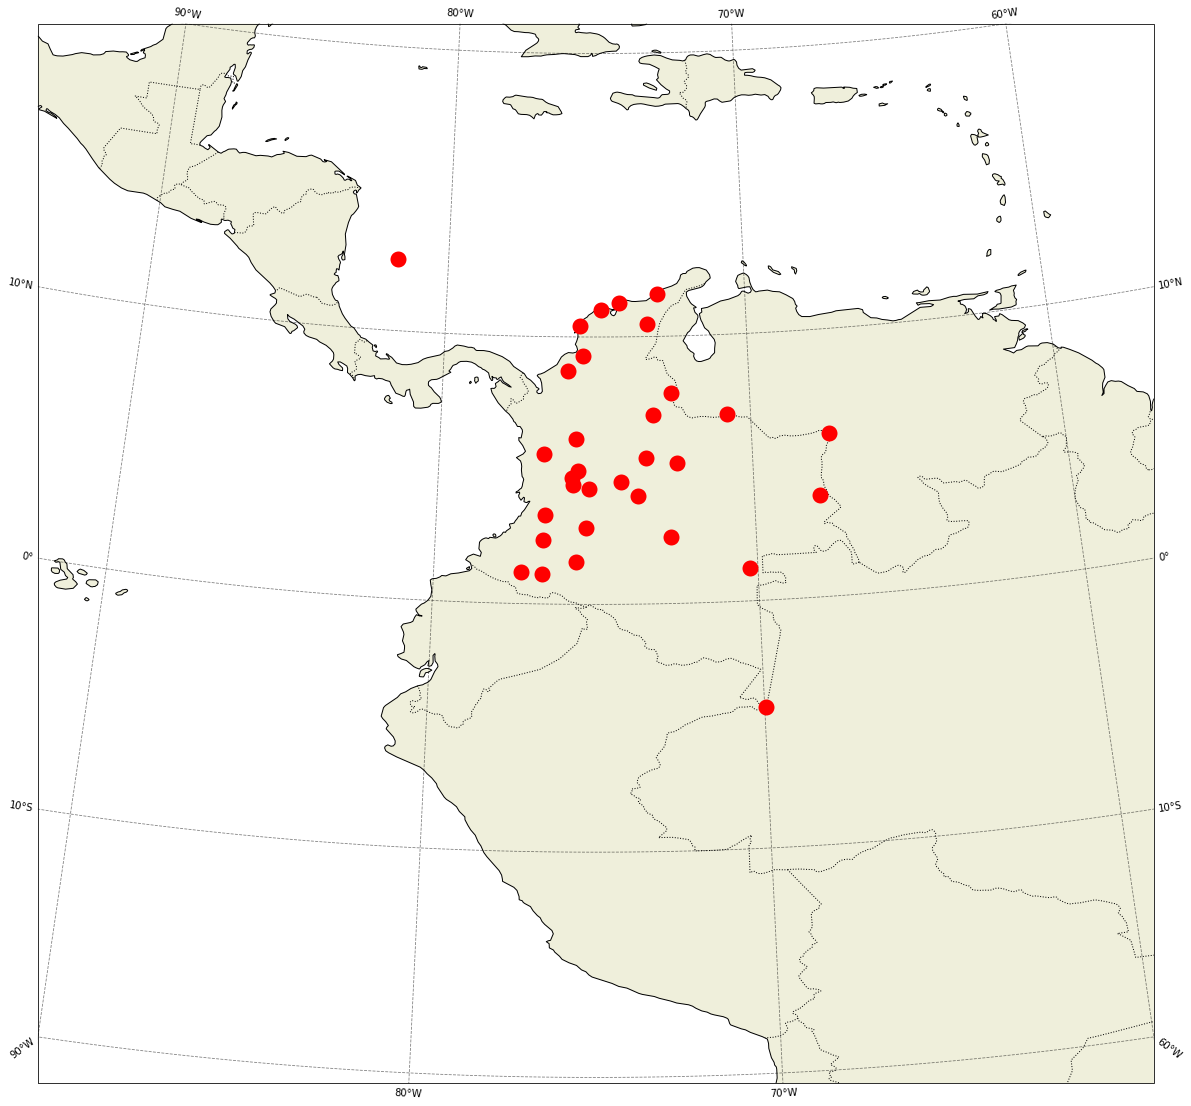

In [7]:
plt.figure(figsize = (20, 25))
ax = plt.axes(projection = ccrs.AlbersEqualArea(-75, 7.5))
ax.set_extent([-90, -60, -20, 20])

# ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND, edgecolor = 'black')
# ax.add_feature(cf.OCEAN)
ax.add_feature(cf.BORDERS, linestyle=':')

ax.gridlines(draw_labels = True, color = 'black', alpha = 0.5, linestyle = '--')

#Recorremos el diccionario y pintamos long y lat
for i in ciudades.values():
    
    plt.plot([i[0]], [i[1]], 
     color = 'red', marker = 'o', 
     transform = ccrs.Geodetic(),markeredgewidth="10"
     )


# Esta porcion de codigo es importante para graficar el punto 5

Esta debe de ser ejecutada antes de desarrollar el punto 5 ya que si no se ejecuta pues la longitud y la latitud nunca se agregan a los datos

In [8]:
#Esto es horrible pero funciona 
# Busacmos en el diccionario que tenemos el valor de la capital para añadirle una lista con la latitud y longitud
for llave,valor in dic.items():
    for i,k in ciudades.items():
        if i == valor["capital"]:
            dic[llave]["lat_lon"] = k

# Desarrollo del punto 4

Cambiar los puntos por un circulo que represente la cantidad de la población (asuma un tamaño para el máximo de población, y con ese saca un tamaño proporcional para las demás ciudades).

El valor maximo en este caso para la poblacion es :  7715778.0


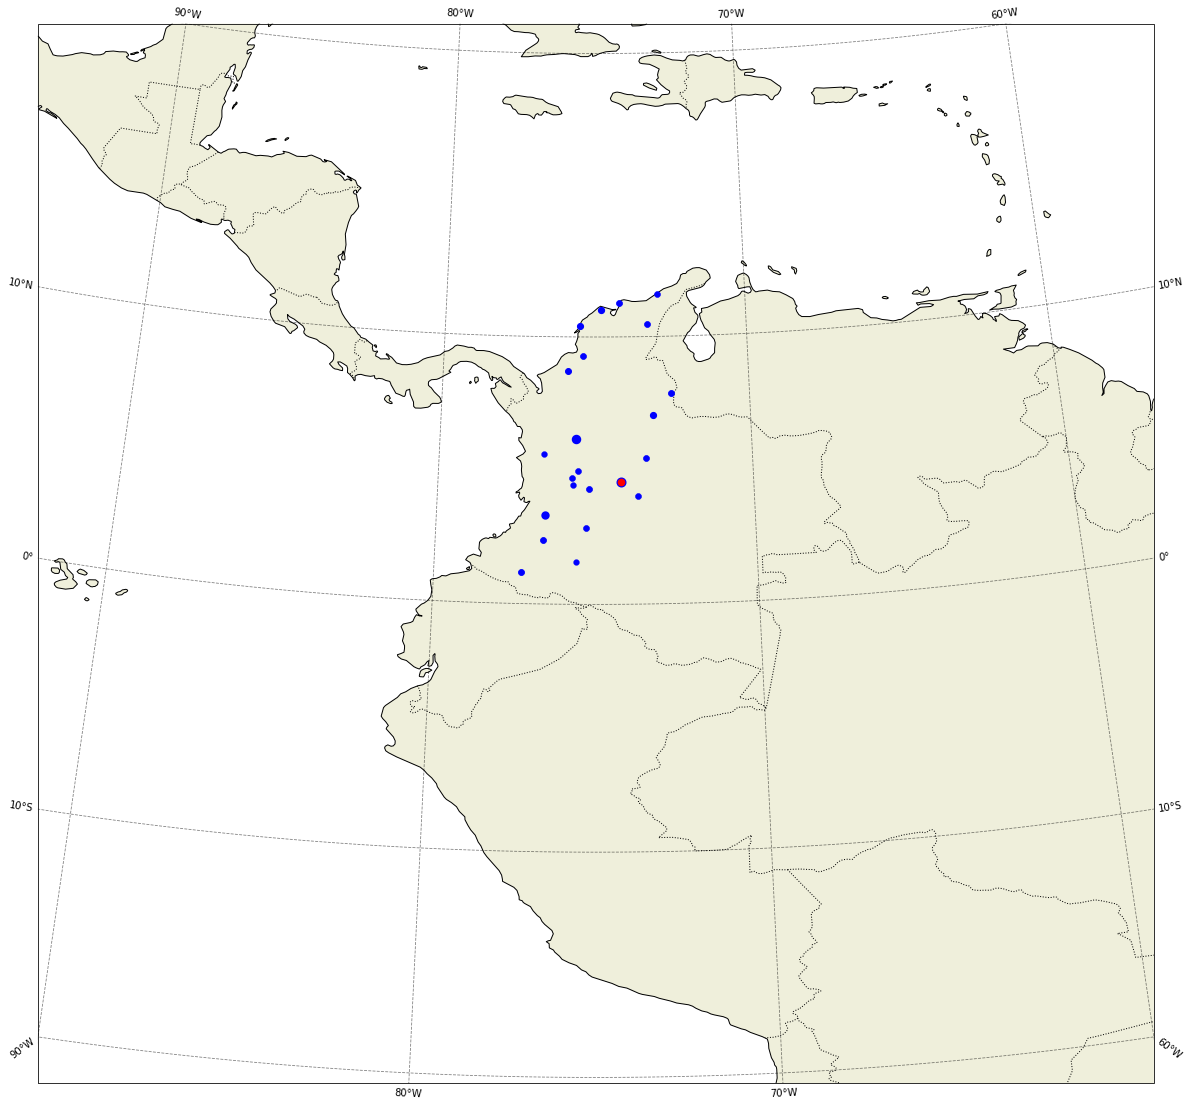

In [9]:
plt.figure(figsize = (20, 25))
ax = plt.axes(projection = ccrs.AlbersEqualArea(-75, 7.5))
ax.set_extent([-90, -60, -20, 20])

# ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND, edgecolor = 'black')
# ax.add_feature(cf.OCEAN)
ax.add_feature(cf.BORDERS, linestyle=':')
maxio = definir_max(dic,"poblacion_cabecera")
print("El valor maximo en este caso para la poblacion es : ",maxio)
ax.gridlines(draw_labels = True, color = 'black', alpha = 0.5, linestyle = '--')
for j,i in dic.items():
    suma = int(i["poblacion_cabecera"])+int(i["poblacion_resto"])
     
    valor = ( (suma*4) / maxio )
    #print(suma,valor)
    valor = round(valor,3)
    
    # Se separa cundinamarca con la capital bogota de Bogota D.C con la capital de bogota
    if j == "Cundinamarca":
        plt.plot([i["lat_lon"][0]], [i["lat_lon"][1]], 
             color = 'red', marker = 'o', 
                 transform = ccrs.Geodetic(),markeredgewidth=str(valor)
             )
        
    else:        
        #print(i["lat_lon"])
        plt.plot([i["lat_lon"][0]], [i["lat_lon"][1]], 
         color = 'blue', marker = 'o', 
         transform = ccrs.Geodetic(),markeredgewidth=str(valor)
         )
        
        
plt.show()
plt.close()

# Desarrollo punto 5
Configurar el mapa , para cambiar la cantidad de la población. 

In [10]:
opciones = ["poblacion","municipios","superficie","indice desarrollo humano"]
#opciones2 = ["pobres","vulnerables","clase media","clase alta","edad trabajadora","economia activa","ocupados","desocupados"]
opciones2 ={"pobres":"pobres",
            "clase media":"clase_media",
            "clase alta":"clase_alta",
            "edad trabajadora":"porc_edad_tra",
           "economia activa":"porc_eco_acti",
            "vulnerables":"vulnerables",
            "ocupados":"porc_ocupados",
            "desocupados":"porc_desocupados"
           }
valida2 = ""
while True:
    print("RECORDAR DIGITAR EXACTAMENTE EL VALOR QUE DESEA ")
    valida = menu()
    #validamos si el valor de la opcion digitada esta en una lista o diccionario si no es asi significa que 
    #podemos acceder directamente a el
    if valida in opciones:
        if valida == "poblacion":
            valida = "poblacion_total" 
        elif valida=="indice desarrollo humano":
            valida="ind_desarrollo_hum"
        maxio = definir_max(dic,valida)
        break
    elif valida in opciones2:
        valida = opciones2[valida]
        print(valida)
        while True:
            print("Digite si desea realizar el calculo por habitantes o por porcentaje")
            valida2 = input("\t\t-habitantes \n\t\t-porcentaje\n\t\t")
            valida2 = valida2.lower()
            if valida2 == "habitantes" or valida2 == "porcentaje":
                if valida2 == "porcentaje":
                    valida2 = "porc"
                break
        maxio = definir_max2(dic,valida,valida2)
        break
#print(maxio)

RECORDAR DIGITAR EXACTAMENTE EL VALOR QUE DESEA 
	-poblacion
	-municipios
	-superficie
	-indice desarrollo humano
	-pobres
	-vulnerables
	-clase media
	-clase alta
	-edad trabajadora
	-economia activa
	-ocupados
	-desocupados
	desocupados
porc_desocupados
Digite si desea realizar el calculo por habitantes o por porcentaje
		-habitantes 
		-porcentaje
		habitantes


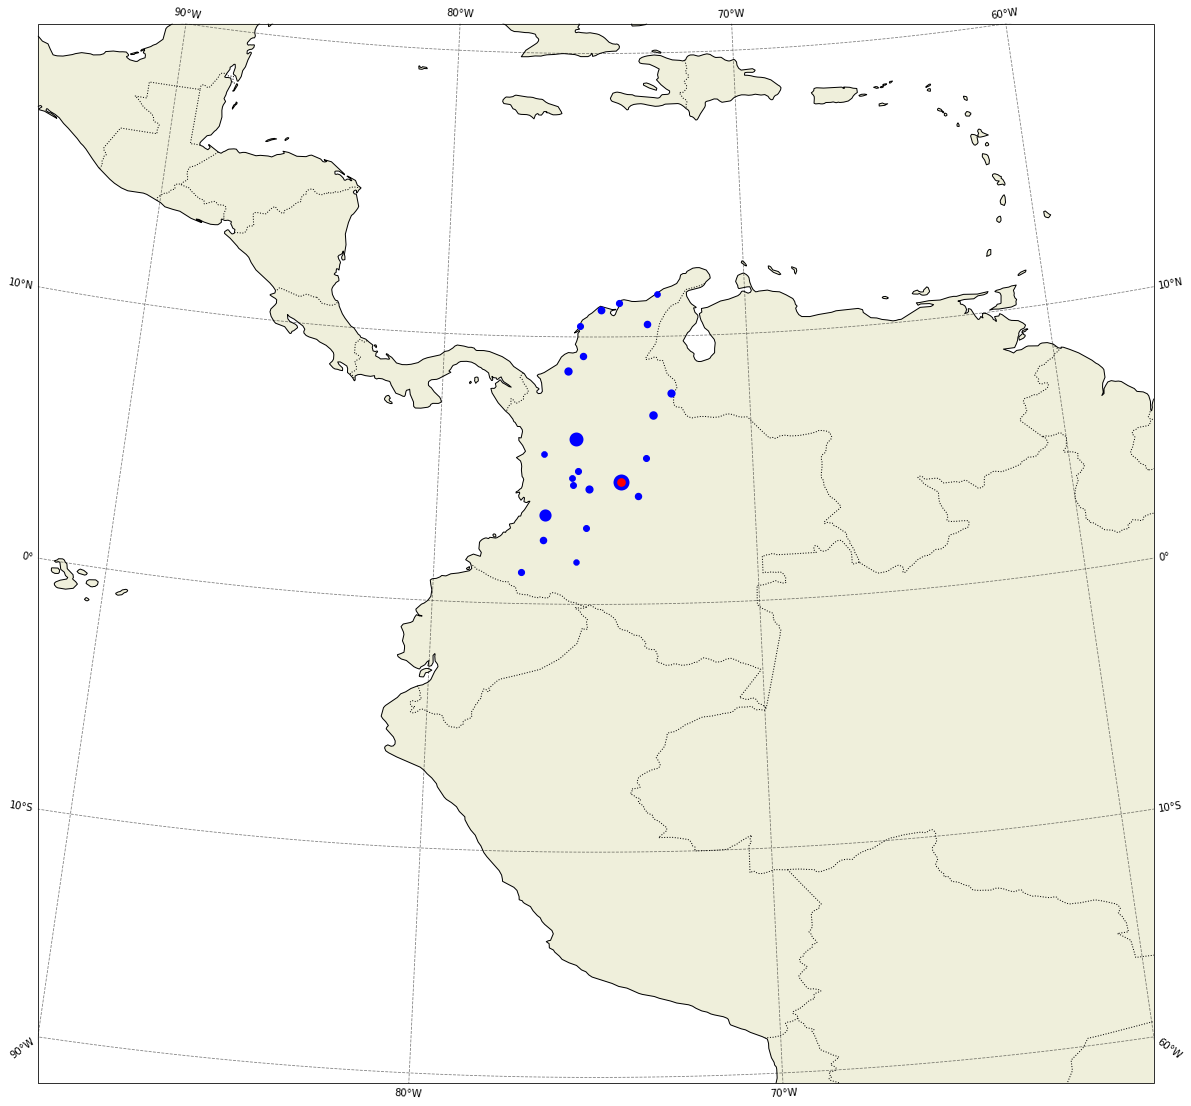

In [11]:
plt.figure(figsize = (20, 25))
ax = plt.axes(projection = ccrs.AlbersEqualArea(-75, 7.5))
ax.set_extent([-90, -60, -20, 20])

# ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND, edgecolor = 'black')
# ax.add_feature(cf.OCEAN)
ax.add_feature(cf.BORDERS, linestyle=':')

ax.gridlines(draw_labels = True, color = 'black', alpha = 0.5, linestyle = '--')
#print(maxio,type(maxio))
for j,i in dic.items():
    #print(j,i[valida],i)
    if valida == "poblacion_total":
        suma =int(i["poblacion_cabecera"])+int(i["poblacion_resto"])
        #print(suma,i["capital"])
        valor = ( (suma*10) / maxio )
    else:
        #Si valida 2 es vacio entonces el valor de la llave no es diccionario ni lista
        if valida2 == "":
            valor = ( (float(i[valida])*10) / maxio )
        else:
            #Significa
            valor = ( (float(i[valida][valida2])*10) / maxio )
    valor = round(valor,3)
    if j == "Cundinamarca":
        plt.plot([i["lat_lon"][0]], [i["lat_lon"][1]], 
             color = 'red', marker = 'o', 
                 transform = ccrs.Geodetic(),markeredgewidth=str(valor)
             )
        
    else:        
        #print(i["lat_lon"])
        plt.plot([i["lat_lon"][0]], [i["lat_lon"][1]], 
         color = 'blue', marker = 'o', 
         transform = ccrs.Geodetic(),markeredgewidth=str(valor)
         )
        
        
plt.show()
plt.close()